# Example of BzFit module with MCMC

Note: This figure was made for the Encyclopedia of Astrophysics (for the magnetic star chapter) by V. Petit

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import specpolFlow as pol

plt.rcParams.update({'font.size':13})

In [8]:
import BzFit_module as m 
import pandas as pd
import scipy.optimize as opt

<ErrorbarContainer object of 3 artists>

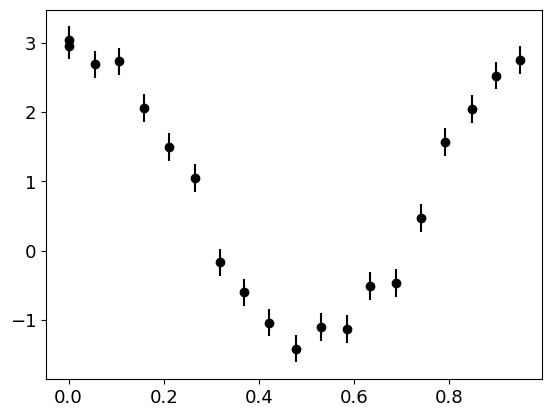

In [9]:
phase = np.load('phase.npy')
Bz = np.load('Bz.npy')
n = Bz.size
sigma = 0.2
data = m.data(phase, Bz, np.ones(n)*sigma)

P = 1.0
jd0 = 0

phi = data.foldphase(P,jd0)

fig, ax = plt.subplots(1,1)
ax.errorbar(phi, data.val, data.val_err,
            ls='', fmt='o', c='k')



In [10]:
fit = m.minimize(data, P, jd0, m.cos_model, theta0=[2,2,0] )


## FOR NEXT TIME -- PASS THE OPTIONS FOR MINIMIZE WITH A **KARGS FOR MORE FLEXIBILITY ?????

335.4828465971573
Optimization terminated successfully.
         Current function value: -6.668796
         Iterations: 163
         Function evaluations: 301
Optimization terminated successfully.


[2.1657159528014223, 0.8300659087525967, -0.05280498867157306]


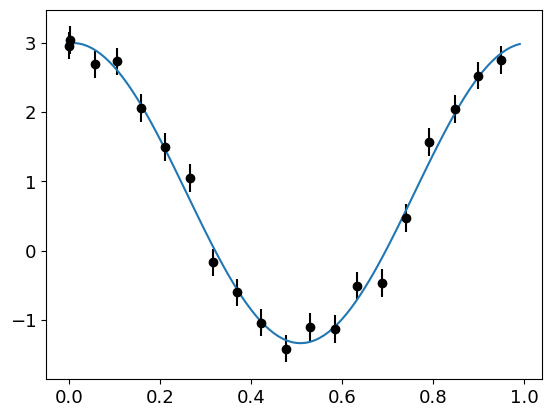

In [16]:
print(fit.to_array())
fig, ax = plt.subplots(1,1)
ax.errorbar(data.foldphase(1,0), data.val, data.val_err,
            ls='', fmt='o', c='k')
arr_phi = np.arange(0,1,0.01)
ax.plot(arr_phi, fit.get_model(arr_phi*2*np.pi) )